# Солитоны


Решаем уравнение Кортевега-де-Вриза в одном измерении численными методами.


## Решение уравнения Кортевега-де-Фриза методом конечных разностей.

Уравнение Кортевега-де-Фриза можно представить как

$$u_t + 6uu_{x} + u_{xxx} = 0$$

Мы хотим найти  $\mathcal{O}(\Delta x^2)$ представления пространственных производных как центральные конечные разности. В Википедии есть таблица [коэффициентов конечной разности](http://en.wikipedia.org/wiki/Finite_difference_coefficient), но мы можем вывести их сами разложением в ряд Тейлора прямых и обратных разностей
\begin{eqnarray}
1) u(x+\Delta x) &=& u(x) + u_x\Delta x + \frac{\Delta x^2}{2}u_{xx} + \frac{\Delta x^3}{3!}u_{xxx} + \frac{\Delta x^4}{4!}u_{xxxx} + \mathcal{O}(\Delta x)^5 \\\
2) u(x-\Delta x) &=& u(x) - u_x\Delta x + \frac{\Delta x^2}{2}u_{xx} - \frac{\Delta x^3}{3!}u_{xxx} +\frac{\Delta x^4}{4!}u_{xxxx} + \mathcal{O}(\Delta x)^5 \\\
3) u(x+2\Delta x) &=& u(x) + 2u_x\Delta x + 2\Delta x^2u_{xx} + \frac{8\Delta x^3}{3!}u_{xxx} +\frac{16\Delta x^4}{4!}u_{xxxx} + \mathcal{O}(\Delta x)^5 \\\
4) u(x-2\Delta x) &=& u(x) - 2u_x\Delta x + 2\Delta x^2u_{xx} - \frac{8\Delta x^3}{3!}u_{xxx} +\frac{16\Delta x^4}{4!}u_{xxxx} + \mathcal{O}(\Delta x)^5
\end{eqnarray}

Вычитание второго из первого дает
$$u(x+\Delta x) - u(x-\Delta x) = 2u_x(\Delta x) + \mathcal{O}(\Delta x^3)$$
или
$$u_x(x) = \frac{u(x+\Delta x) - u(x-\Delta x)}{2\Delta x} + \mathcal{O}(\Delta x^2)$$

Далее рассмотрим 2*(ур3 - ур4) + (ур1 - ур2)
\begin{eqnarray}
&& \frac{u(x)}{2} + \Delta x u_x(x) + \Delta x^2 u_{xx} + \frac{4}{3!}u_{xxx} + \frac{8\Delta x^4}{4!}u_{xxxx}  \\\
&-& u(x) - \Delta x u_{x}(x) - \frac{\Delta x^2}{2}u_{xx} -\frac{\Delta x^3}{3!}u_{xxx} - \frac{\Delta x^4}{4!}u_{xxxx} \\\
&+& u(x) - \Delta x u_{x}(x) + \frac{\Delta x^2}{2}u_{xx} -\frac{\Delta x^3}{3!}u_{xxx} + \frac{\Delta x^4}{4!}u_{xxxx} \\\
&-& \frac{u(x)}{2} + \Delta x u_x(x) - \Delta x^2 u_{xx} + \frac{4}{3!}u_{xxx} - \frac{8\Delta x^4}{4!}u_{xxxx} + \mathcal{O}(\Delta x^5)
&=& \Delta x^3 u_{xxx}(x) + \mathcal{O}(\Delta x^5)
\end{eqnarray}
или
$$u_{xxx} = \frac{u(x+2\Delta x) - 2u(x+\Delta x) + 2u(x+\Delta x) - u(x-2\Delta x)}{\Delta x^3} + \mathcal{O}(\Delta x^2)$$

## Анализ устойчивости по фон Нейману
Рассмотрим простую прямую разность для производной по времени. Анализ устойчивости по фон Нейману позволяет нам определить верхнюю границу приемлемых значений $\Delta t$ и $\Delta x$. Устойчивость решения определяется третьей производной, поэтому мы анализируем $u_t = -u_{xxx}$. Пусть $j$ - конечные шаги во времени, $n$ - в пространстве
$$
\frac{u^{j+1}_n - u_n^j}{\Delta t} = -\frac{u^j_{n+2}-2u^j_{n+1}+2u^j_{n-1}-u^j_{n-2}}{\Delta x^3}
$$
или
$$
u^{j+1} = u_n^j - \frac{\Delta t}{\Delta x^3}\left(u_{n+2}^j - 2u_{n+1}^j + 2u_{n-1}^j - u^j_{n-2}\right)
$$
Анализ фон Неймана предполагает, что ошибки будут расти экспоненциально и что мы используем периодические граничные условия, поэтому
$$
e^{a(t+\Delta t)}e^{ik_m x} = e^{at}e^{ik_mx}-\frac{\Delta t}{\Delta x^3}
\left[e^{at}e^{ik_m(x+2\Delta x)} - 2e^{at}e^{ik_m(x+\Delta x)} 
+ 2e^{at}e^{-ik_m(x-\Delta x)} - e^{at}e^{-ik_m(x-2\Delta x)}\right]
$$
Упрощаем
\begin{eqnarray}
e^{a\Delta t} &=& 1 - \frac{\Delta t}{\Delta x^3}\left[ e^{2ik_m\Delta x} - 2e^{ik_m\Delta x} + 2e^{-ik_m\Delta x} - e^{-2ik_m\Delta x}\right] \\\
&=& 1 - \frac{\Delta t}{\Delta x^3}\left[\sin{(2k_m\Delta x)} - 2\sin{(k_m\Delta x)}\right]
\end{eqnarray}
Для стабильности требуем
$$\left|1 - \frac{\Delta t}{\Delta x^3}\left(\sin{(2k_m\Delta x)} - 2\sin{(k_m\Delta x)}\right)\right|$$
Нужно найти максимум $\sin{(2k_m\Delta x)} - 2\sin{(k_m\Delta x)}$, берём производную, ищем экстремум $\cos{2k_m\Delta x} = cos(k\Delta x)$. Раскрывая первый член, находим
$$
2\cos^2{k\Delta x} - 1 = \cos{k\Delta x}
$$
т.е. $\cos{k\Delta x} = 1, -1/2$

$1$ - минимум, $-1/2$ - максимум
$$
\cos{k\Delta x} = -\frac{1}{2}\qquad \rightarrow \qquad k\Delta x = \frac{2\pi}{3}+n\pi
$$
поэтому
$$
\max{\left|\sin{(2k_m\Delta x)} - 2\sin{(k_m\Delta x)}\right|} = \frac{3\sqrt{3}}{2}
$$
Условие устойчивости
$$\Delta t \leq \frac{2\Delta x^3}{3\sqrt{3}}$$

In [20]:
from IPython.display import HTML
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [12]:
def kdv(x,t,dx):
    up1 = np.hstack([x[1:], x[:1]])
    up2 = np.hstack([x[2:], x[:2]])
    up3 = np.hstack([x[3:], x[:3]])
    up4 = np.hstack([x[4:], x[:4]])
    um1 = np.hstack([x[-1:], x[:-1]])
    um2 = np.hstack([x[-2:], x[:-2]])
    um3 = np.hstack([x[-3:], x[:-3]])
    um4 = np.hstack([x[-4:], x[:-4]])
    
    # O(h^2) Central differences
    #ux1 = (up1 - um1) / (2 * dx)
    #ux3 = (up2 - 2 * up1 + 2 * um1 - um2) / (2 * dx * dx * dx)

    # O(h^4) Central differences
    #ux1 = (-(up2 - um2) + 8 * (up1 - um1)) / (12 * dx)
    #ux3 = (-(up3 - um3) + 8 * (up2 - um2) - 13 * (up1 - um1)) / (8 * dx * dx * dx)
    
    #O(h^6) Central differences
    ux1 = ((up3 - um3) - 9 * (up2 - um2) + 45 * (up1 - um1)) / (60 * dx)
    ux3 = (7 * (up4 - um4) - 72 * (up3 - um3) + 338 * (up2 - um2) - 488 * (up1 - um1)) / (240 * dx * dx * dx)
    
    return -6 * x * ux1 - ux3

In [13]:
def rk4(x, dt, dx):
    k1 = dt * kdv(x, 0, dx)
    k2 = dt * kdv(x + k1 * 0.5, 0, dx)
    k3 = dt * kdv(x + k2 * 0.5, 0, dx)
    k4 = dt * kdv(x + k3, 0, dx)
    return x + 1/6. * (k1 + 2*k2 + 2*k3 + k4)

In [14]:
def kdvExact(x,t,v,x0):
    a = np.cosh(0.5 * np.sqrt(v) * (x - v * t - x0))
    return v / (2 * a * a)

In [15]:
dx = 0.1

2 * dx * dx * dx / (3*np.sqrt(3))

0.0003849001794597506

Начиная с этого значения для $\Delta x$, условие фон Неймана выше дает нам наихудшее условие для размера $\Delta t_{max}=\frac{2\Delta x^3}{3\sqrt{3}}\approx 0.4e-4$

In [16]:
2 * dx ** 3 / (3*np.sqrt(3))

0.0003849001794597506

In [17]:
dx = 0.1
dt = 1e-4
x = np.arange(-8,8,dx)
y = kdvExact(x,0,16.,0)

Начальные условия
=======
Самый простой способ создания солитонов — использовать kdvExact для задания начальных условий, например:

* *Одиночный солитон*: y = kdvExact(x, 0, 16., 0)
* *Пара солитонов*: y = kdvExact(x, 0, 16., 4) + kdvExact(x, 0, 4, -4)
* *Гауссиан*: y = 8 * np.exp(-x*x)

In [27]:
y = kdvExact(x, 0, 16., 4) + kdvExact(x, 0, 4, -4)

In [9]:
#from scipy.integrate import odeint
#res = odeint(kdv,y,np.linspace(0,0.1,1000),args=(dx,))

<IPython.core.display.Javascript object>


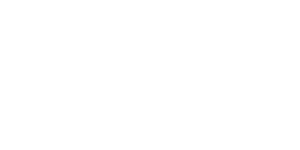

In [28]:
fig, ax = plt.subplots();
line, = ax.plot([], [])
ax.set_ylim([-2, 12])
ax.set_xlim([-8, 8])
def init():
    line.set_data([], [])

def animate(i):
    global y
    for i in range(50):
        y = rk4(y, dt, dx)
    line.set_data(x, y)

# N.B. The time elapsed here is going to be (frames * skip)*dt. For dt=1e-4, fames=400 gives 2 seconds.
anim = FuncAnimation(fig, animate, init_func=init, frames=400, interval = 20, repeat=False) 

plt.close()

HTML(anim.to_jshtml())